In [35]:
import matplotlib.pyplot as plt
import numpy as np
import analyzer
import Compare
import Read
import Maxima
import re
import os
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D
import importlib
importlib.reload(Compare)
importlib.reload(analyzer)
importlib.reload(Read)
importlib.reload(Maxima)
plt.rcParams['text.usetex'] = True
plt.rcParams.update({'font.size': 16})

In [18]:
plt.rcParams.update({'font.size': 16})

folder="../4x4x4x32/b2p44_new/gf_afm_2p0t/"
sizes=[4,4,4,32]
max_modes=8
colors=3
spin_length=4

conf_start=10
conf_end=500
conf_step=10
conf=np.arange(conf_start,conf_end,conf_step)

lambda_min=0.01
lambda_max=0.20
steps=20
lambdas=np.linspace(lambda_min,lambda_max,num=steps)
max_modes=8
RPO_threshold=0.15

#Compare.Index_dic(folder,lambdas, conf)
Compare.GM_RPO_cut(folder,sizes,max_modes,colors,spin_length,conf,lambdas,RPO_threshold)

#Compare.GM_RPO_modes(folder,sizes,max_modes,colors,spin_length,conf_start,conf_end,conf_step,RPO_threshold)


['10', '30', '40', '50', '60', '70', '100', '110', '130', '140', '160', '170', '180', '190', '200', '210', '230', '240', '280', '290', '300', '310', '320', '330', '340', '360', '390', '400', '410', '420', '430', '440', '450', '460', '470', '480', '490']


KeyboardInterrupt: 

### 8x64

In [63]:
folder="../8x8x8x64_su2/b2p60/gf_afm_3p0t/"
sizes=[8,8,8,64]
t=np.arange(0,sizes[3])
colors=3
spin=4

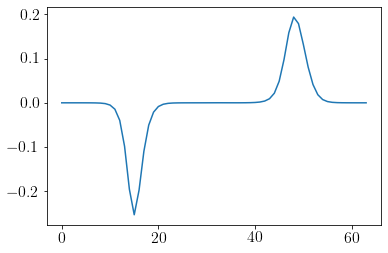

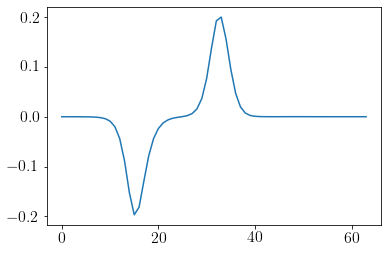

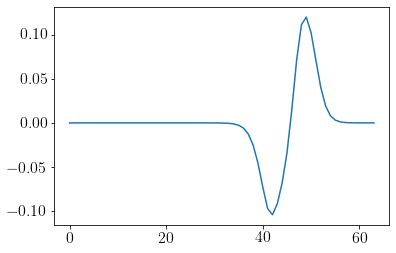

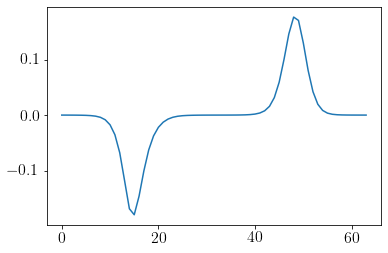

In [66]:
conf=300
for i in range(0,4,1):
    measure="sector_0/"
    mode=folder+measure+"SusyMode_bin_"+str(i)+"-"+str(conf)
    density,sizes=Read.bin_mode(mode,sizes,colors,spin)
    density_s0=density.sum(axis=(0,1,2))
    
    measure="sector_1/"
    mode=folder+measure+"SusyMode_bin_"+str(i)+"-"+str(conf)
    density,sizes=Read.bin_mode(mode,sizes,colors,spin)
    density_s1=density.sum(axis=(0,1,2))
    
    density=density_s1-density_s0
    plt.plot(t,density)
    plt.show()

### Caloron

In [32]:
folder="../caloron_Q1/"

[4, 20, 20, 20]


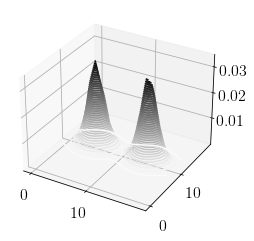

In [31]:
measure="gf/"
prof=folder+measure+"profile4dt0.4c100to.dat"

density,sizes=Read.topology(prof)
print(sizes)

density_2d=density.sum(axis=(0,1))

fig = plt.figure()
ax = plt.axes(projection='3d')
X=np.arange(0,sizes[2])
Y=np.arange(0,sizes[3])
ax.contour3D(X,Y,density_2d, 50, cmap='binary')

[4, 20, 20, 20]
[[ 0  3]
 [ 9 10]
 [10 10]
 [14  5]]


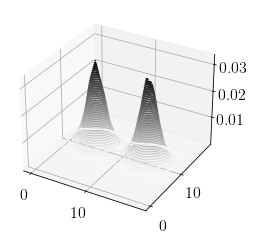

In [41]:
measure="afm/parity_1/"
prof=folder+measure+"SusyMode"

density,sizes=Read.ascii_mode(prof)
print(sizes)

density_2d=density.sum(axis=(0,1))
maxima=Maxima.simple(density,sizes)
print(maxima)

density.astype('float32').tofile("../caloron.dat")

fig = plt.figure()
ax = plt.axes(projection='3d')
X=np.arange(0,sizes[2])
Y=np.arange(0,sizes[3])
ax.contour3D(X,Y,density_2d, 50, cmap='binary')

In [42]:
4*20*20*20

32000